In [0]:
from zipfile import ZipFile
file_name="plantvillage.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
# PACKAGES NEEDED:
# tensorflow, matplotlib (available with pip)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


    
# getting data
base_dir = 'plantvillage' 
train_dir = os.path.join(base_dir, 'Training') 
validation_dir = os.path.join(base_dir, 'Validation') 

train_Tomato_Bacterial_spot = os.path.join(train_dir, 'Tomato_Bacterial_spot') 
train_Tomato_Early_blight = os.path.join(train_dir, 'Tomato_Early_blight') 
train_Tomato_healthy = os.path.join(train_dir, 'Tomato_healthy') 
train_Tomato_Late_blight = os.path.join(train_dir, 'Tomato_Late_blight') 
train_Tomato_Leaf_Mold = os.path.join(train_dir, 'Tomato_Leaf_Mold') 
train_Tomato_Septoria_leaf_spot = os.path.join(train_dir, 'Tomato_Septoria_leaf_spot') 
train_Tomato_Spider_mites_Two_spotted_spider_mite = os.path.join(train_dir, 'Tomato_Spider_mites_Two-spotted_spider_mite') 
train_Tomato_Target_Spot = os.path.join(train_dir, 'Tomato_Target_Spot') 
train_Tomato_mosaic_virus = os.path.join(train_dir, 'Tomato_Tomato_mosaic_virus') 
train_Tomato_Yellow_Leaf_Curl_Virus = os.path.join(train_dir, 'Tomato_Tomato_Yellow_Leaf_Curl_Virus') 

validation_Tomato_Bacterial_spot = os.path.join(validation_dir, 'Tomato_Bacterial_spot')
validation_Tomato_Early_blight = os.path.join(validation_dir, 'Tomato_Early_blight') 
validation_Tomato_healthy = os.path.join(validation_dir, 'Tomato_healthy') 
validation_Tomato_Late_blight = os.path.join(validation_dir, 'Tomato_Late_blight') 
validation_Tomato_Leaf_Mold = os.path.join(validation_dir, 'Tomato_Leaf_Mold') 
validation_Tomato_Septoria_leaf_spot = os.path.join(validation_dir, 'Tomato_Septoria_leaf_spot') 
validation_Tomato_Spider_mites_Two_spotted_spider_mite = os.path.join(validation_dir, 'Tomato_Spider_mites_Two-spotted_spider_mite') 
validation_Tomato_Target_Spot = os.path.join(validation_dir, 'Tomato_Target_Spot') 
validation_Tomato_mosaic_virus = os.path.join(validation_dir, 'Tomato_Tomato_mosaic_virus') 
validation_Tomato_Yellow_Leaf_Curl_Virus = os.path.join(validation_dir, 'Tomato_Tomato_Yellow_Leaf_Curl_Virus') 

num_tr_dis1 = len(os.listdir(train_Tomato_Bacterial_spot)) 
num_tr_dis2 = len(os.listdir(train_Tomato_Early_blight)) 
num_tr_dis3 = len(os.listdir(train_Tomato_healthy)) 
num_tr_dis4 = len(os.listdir(train_Tomato_Late_blight)) 
num_tr_dis5 = len(os.listdir(train_Tomato_Leaf_Mold)) 
num_tr_dis6 = len(os.listdir(train_Tomato_Septoria_leaf_spot)) 
num_tr_dis7 = len(os.listdir(train_Tomato_Spider_mites_Two_spotted_spider_mite)) 
num_tr_dis8 = len(os.listdir(train_Tomato_Target_Spot)) 
num_tr_dis9 = len(os.listdir(train_Tomato_mosaic_virus)) 
num_tr_dis10 = len(os.listdir(train_Tomato_Yellow_Leaf_Curl_Virus))

num_val_dis1 = len(os.listdir(validation_Tomato_Bacterial_spot))
num_val_dis2 = len(os.listdir(validation_Tomato_Early_blight))
num_val_dis3 = len(os.listdir(validation_Tomato_healthy))
num_val_dis4 = len(os.listdir(validation_Tomato_Late_blight))
num_val_dis5 = len(os.listdir(validation_Tomato_Leaf_Mold))
num_val_dis6 = len(os.listdir(validation_Tomato_Septoria_leaf_spot))
num_val_dis7 = len(os.listdir(validation_Tomato_Spider_mites_Two_spotted_spider_mite))
num_val_dis8 = len(os.listdir(validation_Tomato_Target_Spot))
num_val_dis9 = len(os.listdir(validation_Tomato_mosaic_virus))
num_val_dis10 = len(os.listdir(validation_Tomato_Yellow_Leaf_Curl_Virus))


total_train = num_tr_dis1 + num_tr_dis2 + num_tr_dis3 + num_tr_dis4 + num_tr_dis5 + num_tr_dis6 + num_tr_dis7 + num_tr_dis8 + num_tr_dis9 + num_tr_dis10
total_val = num_val_dis1 + num_val_dis2 + num_val_dis3 + num_val_dis4 + num_val_dis5 + num_val_dis6 + num_val_dis7 + num_val_dis8 + num_val_dis9 + num_val_dis10

BATCH_SIZE = 32
IMG_SHAPE = 150 # square image


#generators

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_image_generator = ImageDataGenerator(
    rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='categorical') 

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='categorical') 


# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(units=10, activation='softmax') #[0, 1] or [1, 0]
    
    ])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

EPOCHS = 50

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=600,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

Found 10629 images belonging to 10 classes.
Found 3899 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
___________________________________

In [0]:
from google.colab import drive
drive.mount('/content/drive')

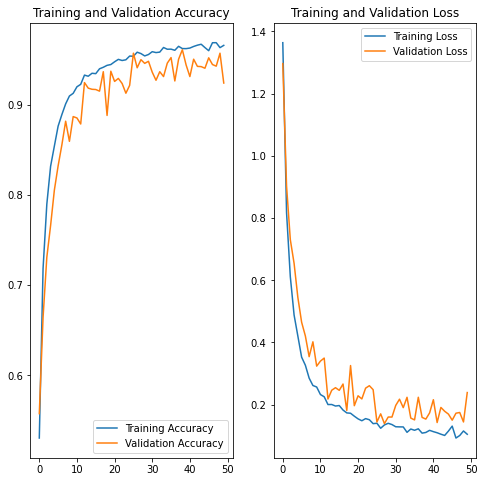

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
model.save('advanced_model.h5')

In [0]:
model

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


    
# getting data
base_dir = 'plantvillage' 
train_dir = os.path.join(base_dir, 'Training') 
validation_dir = os.path.join(base_dir, 'Validation') 

train_Tomato_Bacterial_spot = os.path.join(train_dir, 'Tomato_Bacterial_spot') 
train_Tomato_Early_blight = os.path.join(train_dir, 'Tomato_Early_blight') 
train_Tomato_healthy = os.path.join(train_dir, 'Tomato_healthy') 
train_Tomato_Late_blight = os.path.join(train_dir, 'Tomato_Late_blight') 
train_Tomato_Leaf_Mold = os.path.join(train_dir, 'Tomato_Leaf_Mold') 
train_Tomato_Septoria_leaf_spot = os.path.join(train_dir, 'Tomato_Septoria_leaf_spot') 
train_Tomato_Spider_mites_Two_spotted_spider_mite = os.path.join(train_dir, 'Tomato_Spider_mites_Two-spotted_spider_mite') 
train_Tomato_Target_Spot = os.path.join(train_dir, 'Tomato_Target_Spot') 
train_Tomato_mosaic_virus = os.path.join(train_dir, 'Tomato_Tomato_mosaic_virus') 
train_Tomato_Yellow_Leaf_Curl_Virus = os.path.join(train_dir, 'Tomato_Tomato_Yellow_Leaf_Curl_Virus') 

validation_Tomato_Bacterial_spot = os.path.join(validation_dir, 'Tomato_Bacterial_spot')
validation_Tomato_Early_blight = os.path.join(validation_dir, 'Tomato_Early_blight') 
validation_Tomato_healthy = os.path.join(validation_dir, 'Tomato_healthy') 
validation_Tomato_Late_blight = os.path.join(validation_dir, 'Tomato_Late_blight') 
validation_Tomato_Leaf_Mold = os.path.join(validation_dir, 'Tomato_Leaf_Mold') 
validation_Tomato_Septoria_leaf_spot = os.path.join(validation_dir, 'Tomato_Septoria_leaf_spot') 
validation_Tomato_Spider_mites_Two_spotted_spider_mite = os.path.join(validation_dir, 'Tomato_Spider_mites_Two-spotted_spider_mite') 
validation_Tomato_Target_Spot = os.path.join(validation_dir, 'Tomato_Target_Spot') 
validation_Tomato_mosaic_virus = os.path.join(validation_dir, 'Tomato_Tomato_mosaic_virus') 
validation_Tomato_Yellow_Leaf_Curl_Virus = os.path.join(validation_dir, 'Tomato_Tomato_Yellow_Leaf_Curl_Virus') 

num_tr_dis1 = len(os.listdir(train_Tomato_Bacterial_spot)) 
num_tr_dis2 = len(os.listdir(train_Tomato_Early_blight)) 
num_tr_dis3 = len(os.listdir(train_Tomato_healthy)) 
num_tr_dis4 = len(os.listdir(train_Tomato_Late_blight)) 
num_tr_dis5 = len(os.listdir(train_Tomato_Leaf_Mold)) 
num_tr_dis6 = len(os.listdir(train_Tomato_Septoria_leaf_spot)) 
num_tr_dis7 = len(os.listdir(train_Tomato_Spider_mites_Two_spotted_spider_mite)) 
num_tr_dis8 = len(os.listdir(train_Tomato_Target_Spot)) 
num_tr_dis9 = len(os.listdir(train_Tomato_mosaic_virus)) 
num_tr_dis10 = len(os.listdir(train_Tomato_Yellow_Leaf_Curl_Virus))

num_val_dis1 = len(os.listdir(validation_Tomato_Bacterial_spot))
num_val_dis2 = len(os.listdir(validation_Tomato_Early_blight))
num_val_dis3 = len(os.listdir(validation_Tomato_healthy))
num_val_dis4 = len(os.listdir(validation_Tomato_Late_blight))
num_val_dis5 = len(os.listdir(validation_Tomato_Leaf_Mold))
num_val_dis6 = len(os.listdir(validation_Tomato_Septoria_leaf_spot))
num_val_dis7 = len(os.listdir(validation_Tomato_Spider_mites_Two_spotted_spider_mite))
num_val_dis8 = len(os.listdir(validation_Tomato_Target_Spot))
num_val_dis9 = len(os.listdir(validation_Tomato_mosaic_virus))
num_val_dis10 = len(os.listdir(validation_Tomato_Yellow_Leaf_Curl_Virus))


total_train = num_tr_dis1 + num_tr_dis2 + num_tr_dis3 + num_tr_dis4 + num_tr_dis5 + num_tr_dis6 + num_tr_dis7 + num_tr_dis8 + num_tr_dis9 + num_tr_dis10
total_val = num_val_dis1 + num_val_dis2 + num_val_dis3 + num_val_dis4 + num_val_dis5 + num_val_dis6 + num_val_dis7 + num_val_dis8 + num_val_dis9 + num_val_dis10

BATCH_SIZE = 32
IMG_SHAPE = 150 # square image


#generators

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_image_generator = ImageDataGenerator(
    rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='categorical') 

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='categorical') 

EPOCHS = 25

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=600,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

Found 10629 images belonging to 10 classes.
Found 3899 images belonging to 10 classes.
Epoch 1/25
600/600 [==============================] - 146s 243ms/step - loss: 0.0921 - accuracy: 0.9712 - val_loss: 0.1616 - val_accuracy: 0.9497
Epoch 2/25
600/600 [==============================] - 145s 242ms/step - loss: 0.0888 - accuracy: 0.9740 - val_loss: 0.2144 - val_accuracy: 0.9338
Epoch 3/25
600/600 [==============================] - 150s 250ms/step - loss: 0.0943 - accuracy: 0.9712 - val_loss: 0.1613 - val_accuracy: 0.9549
Epoch 4/25
600/600 [==============================] - 150s 251ms/step - loss: 0.0974 - accuracy: 0.9699 - val_loss: 0.1217 - val_accuracy: 0.9620
Epoch 5/25
600/600 [==============================] - 150s 250ms/step - loss: 0.0717 - accuracy: 0.9771 - val_loss: 0.1980 - val_accuracy: 0.9415
Epoch 6/25
600/600 [==============================] - 151s 252ms/step - loss: 0.0945 - accuracy: 0.9712 - val_loss: 0.1747 - val_accuracy: 0.9446
Epoch 7/25
600/600 [=================

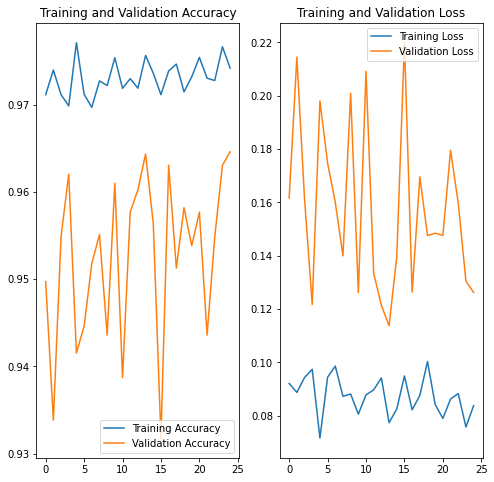

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

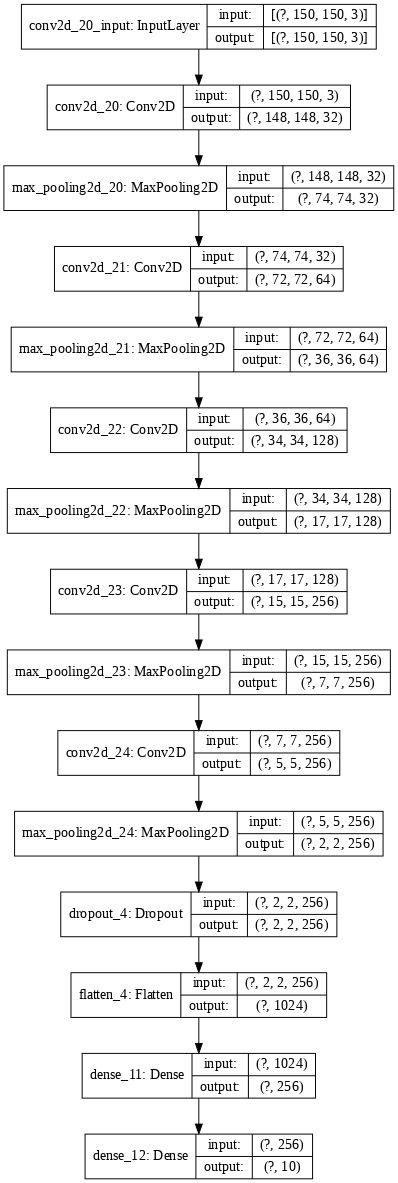

In [0]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=70,
)